# Data Cleaning and Preprocessing

## Train Data 

### Import Libraries & Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
train_df = pd.read_csv('./datasets/edatrain.csv')

## Data Summary

In [3]:
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2027 non-null   int64  
 1   pid              2027 non-null   int64  
 2   ms_subclass      2027 non-null   int64  
 3   ms_zoning        2027 non-null   object 
 4   lot_frontage     1702 non-null   float64
 5   lot_area         2027 non-null   int64  
 6   street           2027 non-null   object 
 7   alley            139 non-null    object 
 8   lot_shape        2027 non-null   object 
 9   land_contour     2027 non-null   object 
 10  utilities        2027 non-null   object 
 11  lot_config       2027 non-null   object 
 12  land_slope       2027 non-null   object 
 13  neighborhood     2027 non-null   object 
 14  condition_1      2027 non-null   object 
 15  condition_2      2027 non-null   object 
 16  bldg_type        2027 non-null   object 
 17  house_style   

#### Observations:
- ms_subclass values does not have any significant relationship to each other
- overall_qual and overall_cond numeric values are not for measurements
- Categorical data can take on numerical values (such as “1” indicating male and “2” indicating female), but those numbers don’t have mathematical meaning.

### Change Column Datatypes

In [5]:
# Change numerical ordinal and nominal to dtypes string
train_df['ms_subclass'] = train_df['ms_subclass'].apply(str)
train_df['overall_qual'] = train_df['overall_qual'].apply(str)
train_df['overall_cond'] = train_df['overall_cond'].apply(str)

In [6]:
print (train_df['ms_subclass'].dtypes)
print (train_df['overall_qual'].dtypes)
print (train_df['overall_cond'].dtypes)

object
object
object


In [7]:
# Drop 'id' & 'pid' columns
train_df1 = train_df.copy()
train_df1.drop(columns=['id', 'pid'], inplace=True)

In [8]:
train_df1.shape

(2027, 79)

### Determine Numerical & Categorical Datas

Numerical and Categorical data will be handled separately

In [9]:
# Separate data into numerical and categorical
catdf = train_df1.select_dtypes(include='object')
numdf = train_df1.select_dtypes(exclude='object')

In [10]:
# Check categorical dataframe details
catdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ms_subclass     2027 non-null   object
 1   ms_zoning       2027 non-null   object
 2   street          2027 non-null   object
 3   alley           139 non-null    object
 4   lot_shape       2027 non-null   object
 5   land_contour    2027 non-null   object
 6   utilities       2027 non-null   object
 7   lot_config      2027 non-null   object
 8   land_slope      2027 non-null   object
 9   neighborhood    2027 non-null   object
 10  condition_1     2027 non-null   object
 11  condition_2     2027 non-null   object
 12  bldg_type       2027 non-null   object
 13  house_style     2027 non-null   object
 14  overall_qual    2027 non-null   object
 15  overall_cond    2027 non-null   object
 16  roof_style      2027 non-null   object
 17  roof_matl       2027 non-null   object
 18  exterior

In [11]:
# Check for null values
catdf.isnull().sum()

ms_subclass          0
ms_zoning            0
street               0
alley             1888
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type        21
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           54
bsmt_cond           54
bsmt_exposure       57
bsmtfin_type_1      54
bsmtfin_type_2      54
heating              0
heating_qc           0
central_air          0
electrical           0
kitchen_qual         0
functional           0
fireplace_qu       998
garage_type        113
garage_finish      114
garage_qual        114
garage_cond        114
paved_drive          0
pool_qc           2020
fence             1628
misc_featur

In [12]:
# Create a fucnction to determine % null values missing 
def percentage_nan(df):
    percentage = (df.isnull().sum() / len(df) * 100)
    percentage = percentage[percentage > 0].sort_values(ascending=False)
    return percentage

In [13]:
# list of categorical columns with null values
per_nan = percentage_nan(catdf)

Text(0, 0.5, 'Features')

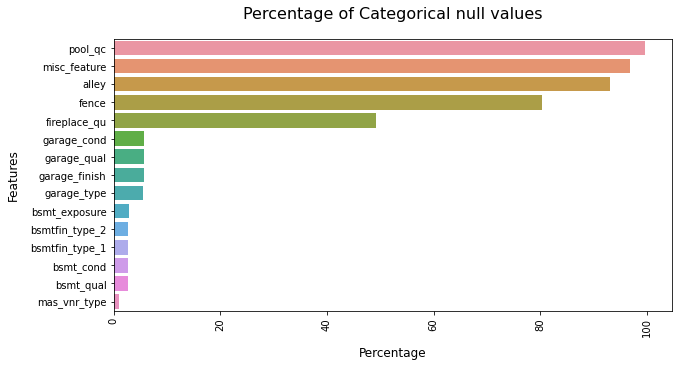

In [14]:
fig, ax = plt.subplots(figsize=(10, 5)) 
sns.barplot(x=per_nan, y=per_nan.index)
plt.title('Percentage of Categorical null values', fontsize=16, pad=20)
plt.xticks(rotation=90)
plt.xlabel('Percentage', fontsize=12, labelpad=10)
plt.ylabel('Features', fontsize=12, labelpad=10)

In [15]:
numdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lot_frontage     1702 non-null   float64
 1   lot_area         2027 non-null   int64  
 2   year_built       2027 non-null   int64  
 3   year_remod/add   2027 non-null   int64  
 4   mas_vnr_area     2006 non-null   float64
 5   bsmtfin_sf_1     2026 non-null   float64
 6   bsmtfin_sf_2     2026 non-null   float64
 7   bsmt_unf_sf      2026 non-null   float64
 8   total_bsmt_sf    2026 non-null   float64
 9   1st_flr_sf       2027 non-null   int64  
 10  2nd_flr_sf       2027 non-null   int64  
 11  low_qual_fin_sf  2027 non-null   int64  
 12  gr_liv_area      2027 non-null   int64  
 13  bsmt_full_bath   2026 non-null   float64
 14  bsmt_half_bath   2026 non-null   float64
 15  full_bath        2027 non-null   int64  
 16  half_bath        2027 non-null   int64  
 17  bedroom_abvgr 

In [16]:
# Numerical data with missing values
numdf.isnull().sum()

lot_frontage       325
lot_area             0
year_built           0
year_remod/add       0
mas_vnr_area        21
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
bsmt_full_bath       1
bsmt_half_bath       1
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
totrms_abvgrd        0
fireplaces           0
garage_yr_blt      114
garage_cars          1
garage_area          1
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
saleprice            0
dtype: int64

In [17]:
# list of numerical columns with null values
per_nan = percentage_nan(numdf)

Text(0, 0.5, 'Features')

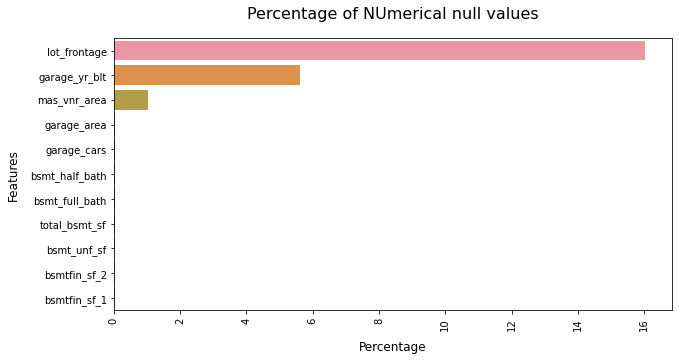

In [18]:
fig, ax = plt.subplots(figsize=(10, 5)) 
sns.barplot(x=per_nan, y=per_nan.index)
plt.title('Percentage of NUmerical null values', fontsize=16, pad=20)
plt.xticks(rotation=90)
plt.xlabel('Percentage', fontsize=12, labelpad=10)
plt.ylabel('Features', fontsize=12, labelpad=10)

## Handle Missing Data - Categorical

After studying categorical data with reference to data dictionary, features with missing values have 'NA' option as part of their values, hence I decided to assign null values as 'NA' instead of 'None'

In [19]:
# Replace missing values in categorical data with str 'NA'
cat_fill = catdf.copy()
cat_fill.fillna('NA', inplace=True)

In [20]:
# Check results of fillna
cat_fill.isnull().sum()

ms_subclass       0
ms_zoning         0
street            0
alley             0
lot_shape         0
land_contour      0
utilities         0
lot_config        0
land_slope        0
neighborhood      0
condition_1       0
condition_2       0
bldg_type         0
house_style       0
overall_qual      0
overall_cond      0
roof_style        0
roof_matl         0
exterior_1st      0
exterior_2nd      0
mas_vnr_type      0
exter_qual        0
exter_cond        0
foundation        0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
heating           0
heating_qc        0
central_air       0
electrical        0
kitchen_qual      0
functional        0
fireplace_qu      0
garage_type       0
garage_finish     0
garage_qual       0
garage_cond       0
paved_drive       0
pool_qc           0
fence             0
misc_feature      0
sale_type         0
dtype: int64

## Handle Missing Data - Numerical

Making use fo the train data to determine the null values and change it on the separate category data

### Lot Values

In [21]:
#Copy dataframe
num_fill = numdf.copy()

In [22]:
# View all columns that contains str 'lot'
lot_data = np.where(train_df.columns.str.contains('lot'))

In [23]:
# View columns associated to 'lot'
train_df[train_df.columns[lot_data]]

,lot_frontage,lot_area,lot_shape,lot_config
0,NaN,13517,IR1,CulDSac
1,43.0,11492,IR1,CulDSac
2,68.0,7922,Reg,Inside
3,73.0,9802,Reg,Inside
4,82.0,14235,IR1,Inside
...,...,...,...,...
2022,79.0,11449,IR1,Inside
2023,NaN,12342,IR1,Inside
2024,57.0,7558,Reg,Inside
2025,80.0,10400,Reg,Corner


In [24]:
train_df[train_df.columns[lot_data]].isnull().sum()

lot_frontage    325
lot_area          0
lot_shape         0
lot_config        0
dtype: int64

#### Observations  
lot_frontage is the only columns above the 'lot' category that has null values. Based on the other features, lot_frontage values is determine by config and area size and min + max values shows that there are no 0 values. 

In this case, we will impute median value to fill the missing null values

In [25]:
# Replace NaN values with median values of lot_frontage
num_fill['lot_frontage'].fillna(num_fill['lot_frontage'].median(), inplace=True)

In [26]:
# Check result after application
num_fill['lot_frontage'].isnull().sum()

0

### Basement Values

In [27]:
# View all columns that contains str 'bsmt'
bsmt_data = np.where(train_df.columns.str.contains('bsmt'))

In [28]:
# View columns associated to 'bsmt'
train_df[train_df.columns[bsmt_data]].isnull().sum()    

bsmt_qual         54
bsmt_cond         54
bsmt_exposure     57
bsmtfin_type_1    54
bsmtfin_sf_1       1
bsmtfin_type_2    54
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
bsmt_full_bath     1
bsmt_half_bath     1
dtype: int64

In [29]:
train_df[train_df.columns[bsmt_data]] 

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
0,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,0.0,0.0
1,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,1.0,0.0
2,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,1.0,0.0
3,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,0.0,0.0
4,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,1.0,0.0
2023,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,0.0,0.0
2024,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,0.0,0.0
2025,TA,TA,No,Rec,155.0,LwQ,750.0,295.0,1200.0,1.0,0.0


In [30]:
train_df[train_df['bsmt_qual'].isnull()][['bsmt_qual', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']]

,bsmt_qual,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
12,NaN,0.0,0.0,0.0,0.0,0.0,0.0
92,NaN,0.0,0.0,0.0,0.0,0.0,0.0
113,NaN,0.0,0.0,0.0,0.0,0.0,0.0
145,NaN,0.0,0.0,0.0,0.0,0.0,0.0
182,NaN,0.0,0.0,0.0,0.0,0.0,0.0
239,NaN,0.0,0.0,0.0,0.0,0.0,0.0
248,NaN,0.0,0.0,0.0,0.0,0.0,0.0
255,NaN,0.0,0.0,0.0,0.0,0.0,0.0
386,NaN,0.0,0.0,0.0,0.0,0.0,0.0
433,NaN,0.0,0.0,0.0,0.0,0.0,0.0


#### Observations  
When the bsmt_qual has a NA values, it shows that there are no basement hence impute values will be 0

In [31]:
# Replace null values with '0'
bsmtlist = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']

for i in bsmtlist:
    num_fill[i].fillna(0, inplace=True)

In [32]:
num_fill[bsmtlist].isnull().sum()

bsmtfin_sf_1      0
bsmtfin_sf_2      0
bsmt_unf_sf       0
total_bsmt_sf     0
bsmt_full_bath    0
bsmt_half_bath    0
dtype: int64

#### Garage Values

In [33]:
# View all columns that contains str 'garage'
garage_data = np.where(train_df.columns.str.contains('garage'))

In [34]:
# Check for null values on columns that contains garage
train_df[train_df.columns[garage_data]].isnull().sum()

garage_type      113
garage_yr_blt    114
garage_finish    114
garage_cars        1
garage_area        1
garage_qual      114
garage_cond      114
dtype: int64

In [35]:
train_df[train_df.columns[garage_data]]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
0,Attchd,1976.0,RFn,2.0,475.0,TA,TA
1,Attchd,1997.0,RFn,2.0,559.0,TA,TA
2,Detchd,1953.0,Unf,1.0,246.0,TA,TA
3,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA
4,Detchd,1957.0,Unf,2.0,484.0,TA,TA
...,...,...,...,...,...,...,...
2022,Attchd,2007.0,Fin,2.0,520.0,TA,TA
2023,Detchd,1961.0,Unf,2.0,539.0,TA,TA
2024,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa
2025,Attchd,1956.0,Unf,1.0,294.0,TA,TA


In [36]:
train_df[train_df['garage_area'].isnull()][['garage_yr_blt', 'garage_cars', 'garage_area', 'garage_finish', 'garage_qual', 'garage_cond']]

,garage_yr_blt,garage_cars,garage_area,garage_finish,garage_qual,garage_cond
1690,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations  
Similar to basement, I will impute 0 values as it shows that there are no garage_yr_built, there are no garage

In [37]:
# Replace null values with '0'
garagelist = ['garage_yr_blt', 'garage_cars', 'garage_area']

for i in garagelist:
    num_fill[i].fillna(0, inplace=True)

In [38]:
# Check result after filling 0 to null values
num_fill[garagelist].isnull().sum()

garage_yr_blt    0
garage_cars      0
garage_area      0
dtype: int64

#### MAS Values

In [39]:
# View all columns that contains str 'mas'
mas_data = np.where(train_df.columns.str.contains('mas'))

In [40]:
train_df[train_df.columns[mas_data]]

,mas_vnr_type,mas_vnr_area
0,BrkFace,289.0
1,BrkFace,132.0
2,None,0.0
3,None,0.0
4,None,0.0
...,...,...
2022,None,0.0
2023,None,0.0
2024,None,0.0
2025,None,0.0


In [41]:
train_df[train_df.columns[mas_data]].isnull().sum()

mas_vnr_type    21
mas_vnr_area    21
dtype: int64

In [42]:
num_fill['mas_vnr_area'].fillna(0, inplace=True)

In [43]:
num_fill['mas_vnr_area'].isnull().sum()

0

In [44]:
# Check results
num_fill.isnull().sum()

lot_frontage       0
lot_area           0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_yr_blt      0
garage_cars        0
garage_area        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
saleprice          0
dtype: int64

In [45]:
# Check shape
print (num_fill.shape)
print (cat_fill.shape)

(2027, 34)
(2027, 45)


## One Hot Encoding

Apply one hot encoding to catergorical features

In [46]:
# Check rows and columns
cat_fill.shape

(2027, 45)

In [47]:
# Using get_dummies function to hot encode categorical data
cat_fill = pd.get_dummies(cat_fill, drop_first=True)

In [48]:
# Check dataframe after encoding
cat_fill

,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,...,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2023,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2024,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2025,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
#Check for null values in numerical dataset
numdf.isnull().sum()

lot_frontage       325
lot_area             0
year_built           0
year_remod/add       0
mas_vnr_area        21
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
bsmt_full_bath       1
bsmt_half_bath       1
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
totrms_abvgrd        0
fireplaces           0
garage_yr_blt      114
garage_cars          1
garage_area          1
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
saleprice            0
dtype: int64

In [50]:
#Check for null values in categorical dataset
catdf.isnull().sum()

ms_subclass          0
ms_zoning            0
street               0
alley             1888
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type        21
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           54
bsmt_cond           54
bsmt_exposure       57
bsmtfin_type_1      54
bsmtfin_type_2      54
heating              0
heating_qc           0
central_air          0
electrical           0
kitchen_qual         0
functional           0
fireplace_qu       998
garage_type        113
garage_finish      114
garage_qual        114
garage_cond        114
paved_drive          0
pool_qc           2020
fence             1628
misc_featur

In [51]:
# Check rows and columns
print (num_fill.shape)
print (cat_fill.shape)

(2027, 34)
(2027, 255)


The rows remains the same while columns have some changes due to the encoding. All missing values have handled during the cleaning process by imputing median value or 0 values

## Join Table

In [52]:
# Join 2 dataframe (numerical and categorical)
new_train_df = pd.concat([num_fill, cat_fill], axis=1)

In [53]:
# Check dataframe
new_train_df.head()

,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,...,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,68.0,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,...,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,...,0,0,0,0,0,0,0,0,0,1
2,68.0,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,...,0,0,0,0,0,0,0,0,0,1
3,73.0,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,...,0,0,0,0,0,0,0,0,0,1
4,82.0,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,...,0,0,0,0,0,0,0,0,0,1


In [54]:
# Check rows and columns
new_train_df.shape

(2027, 289)

In [55]:
# Checking if there are any duplicate rows in the new dataframe
new_train_df.loc[:, ~new_train_df.columns.duplicated()]

,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,...,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,68.0,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,...,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,...,0,0,0,0,0,0,0,0,0,1
2,68.0,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,...,0,0,0,0,0,0,0,0,0,1
3,73.0,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,...,0,0,0,0,0,0,0,0,0,1
4,82.0,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,79.0,11449,2007,2007,0.0,1011.0,0.0,873.0,1884.0,1728,...,0,0,0,0,0,0,0,0,0,1
2023,68.0,12342,1940,1950,0.0,262.0,0.0,599.0,861.0,861,...,0,0,0,0,0,0,0,0,0,1
2024,57.0,7558,1928,1950,0.0,0.0,0.0,896.0,896.0,1172,...,0,0,0,0,0,0,0,0,0,1
2025,80.0,10400,1956,1956,0.0,155.0,750.0,295.0,1200.0,1200,...,0,0,0,0,0,0,0,0,0,1


In [56]:
# Check for null values
new_train_df.isnull().sum()

lot_frontage       0
lot_area           0
year_built         0
year_remod/add     0
mas_vnr_area       0
                  ..
sale_type_ConLI    0
sale_type_ConLw    0
sale_type_New      0
sale_type_Oth      0
sale_type_WD       0
Length: 289, dtype: int64

In [57]:
# Check column names
new_train_df.columns

Index(['lot_frontage', 'lot_area', 'year_built', 'year_remod/add',
       'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', '1st_flr_sf',
       ...
       'misc_feature_Shed', 'misc_feature_TenC', 'sale_type_CWD',
       'sale_type_Con', 'sale_type_ConLD', 'sale_type_ConLI',
       'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=289)

In [58]:
new_train_df.to_csv('./datasets/cleantrain.csv', index=False)

# Test Data

Similar to train data, my test data has to been clean similarly

In [59]:
# Read data
test_df = pd.read_csv('./datasets/test.csv')

In [60]:
# Check first 5 rows
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [61]:
# Check rows and columns
test_df.shape

(878, 80)

In [62]:
# Check column names
test_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

### House Keeping

In [63]:
# Change column name to 'lower' and replace white space with '_'
test_df.columns = test_df.columns.str.lower().str.replace(' ', '_')

In [64]:
# Check if there are any missing features in test data against train data
cols = []

for i in test_df.columns:
    if i not in train_df.columns :
        cols.append(i)
        
print (cols)        

[]


#### Observation
- There are no duplicate columns in both train and test data

### Data Cleaning

In [65]:
# drop pid columns
test_df.drop(columns=['pid'], inplace=True)

In [66]:
test_df.shape

(878, 79)

### Determine Numerical & Categorical Data

In [67]:
# Separate test data into numerical and categorical                                                                                                                
catdf1 = test_df.select_dtypes(include='object')
numdf1 = test_df.select_dtypes(exclude='object')

In [68]:
cat_fill1 = catdf1.copy()

In [69]:
# Check for null values
cat_fill1.isnull().sum()

ms_zoning           0
street              0
alley             820
lot_shape           0
land_contour        0
utilities           0
lot_config          0
land_slope          0
neighborhood        0
condition_1         0
condition_2         0
bldg_type           0
house_style         0
roof_style          0
roof_matl           0
exterior_1st        0
exterior_2nd        0
mas_vnr_type        1
exter_qual          0
exter_cond          0
foundation          0
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
heating             0
heating_qc          0
central_air         0
electrical          1
kitchen_qual        0
functional          0
fireplace_qu      422
garage_type        44
garage_finish      45
garage_qual        45
garage_cond        45
paved_drive         0
pool_qc           874
fence             706
misc_feature      837
sale_type           0
dtype: int64

In [70]:
# Replace missing values in categorical data with str 'NA'
cat_fill1 = catdf1.copy()
cat_fill1.fillna('NA', inplace=True)

In [71]:
# Check results of fillna
cat_fill.isnull().sum().sum()

0

In [72]:
num_fill1 = numdf1.copy()

In [73]:
# Check for null values
num_fill1.isnull().sum()

id                   0
ms_subclass          0
lot_frontage       160
lot_area             0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
mas_vnr_area         1
bsmtfin_sf_1         0
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
bsmt_full_bath       0
bsmt_half_bath       0
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
totrms_abvgrd        0
fireplaces           0
garage_yr_blt       45
garage_cars          0
garage_area          0
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
dtype: int64

#### Observations  
- there are only 3 features with error and will be treated similarly to train data

### Lot Data

In [74]:
#Fill null values with median()
num_fill1['lot_frontage'].fillna(num_fill1['lot_frontage'].median(), inplace=True)

In [75]:
num_fill1.isnull().sum()

id                  0
ms_subclass         0
lot_frontage        0
lot_area            0
overall_qual        0
overall_cond        0
year_built          0
year_remod/add      0
mas_vnr_area        1
bsmtfin_sf_1        0
bsmtfin_sf_2        0
bsmt_unf_sf         0
total_bsmt_sf       0
1st_flr_sf          0
2nd_flr_sf          0
low_qual_fin_sf     0
gr_liv_area         0
bsmt_full_bath      0
bsmt_half_bath      0
full_bath           0
half_bath           0
bedroom_abvgr       0
kitchen_abvgr       0
totrms_abvgrd       0
fireplaces          0
garage_yr_blt      45
garage_cars         0
garage_area         0
wood_deck_sf        0
open_porch_sf       0
enclosed_porch      0
3ssn_porch          0
screen_porch        0
pool_area           0
misc_val            0
mo_sold             0
yr_sold             0
dtype: int64

### Garage Values

In [76]:
# Fill null values in garage with 0
garagelist = ['garage_yr_blt', 'garage_cars', 'garage_area']

for i in garagelist:
    num_fill1[i].fillna(0, inplace=True)

In [77]:
# Check for null values in garage
num_fill1[garagelist].isnull().sum()

garage_yr_blt    0
garage_cars      0
garage_area      0
dtype: int64

### Mas Values

In [78]:
# Fill null values in Mas with 0
num_fill1['mas_vnr_area'].fillna(0, inplace=True)

In [79]:
# Check null values in Mas
num_fill1.isnull().sum()

id                 0
ms_subclass        0
lot_frontage       0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_yr_blt      0
garage_cars        0
garage_area        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
dtype: int64

## Test One Hot Encoding

In [80]:
# Check rows and columns
cat_fill1.shape

(878, 42)

In [81]:
# Using get_dummies function to hot encode test categorical data
cat_fill1 = pd.get_dummies(cat_fill1, drop_first=True)

In [82]:
# Check rows and columns
cat_fill.shape

(2027, 255)

In [83]:
# Check null values
cat_fill.isnull().sum().sum()

0

### Join Table

In [84]:
# Join table for test numerical and categorical data
new_test_df = pd.concat([num_fill1, cat_fill1], axis=1)

In [85]:
new_test_df.head()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,190,69.0,9142,6,8,1910,1950,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,2718,90,68.0,9662,5,4,1977,1977,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2414,60,58.0,17104,7,5,2006,2006,0.0,554,...,0,0,0,0,0,0,1,0,0,0
3,1989,30,60.0,8520,5,6,1923,2006,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,625,20,68.0,9500,6,5,1963,1963,247.0,609,...,0,0,0,0,0,0,0,0,0,1


In [86]:
# Check for total null values
new_test_df.isnull().sum().sum()

0

In [87]:
# Check rows and columns
new_test_df.shape

(878, 245)

### Check columns with Train Data

In [88]:
cols1 = []

for i in new_test_df.columns:
    if i not in new_train_df.columns:
        cols1.append(i)
        
print (cols1)

['id', 'ms_subclass', 'overall_qual', 'overall_cond', 'roof_matl_Metal', 'roof_matl_Roll', 'exterior_1st_PreCast', 'exterior_2nd_Other', 'exterior_2nd_PreCast', 'mas_vnr_type_CBlock', 'heating_GasA', 'electrical_NA', 'kitchen_qual_Po', 'sale_type_VWD']


In [89]:
len(cols1)

14

In [90]:
# Make a copy of test_df dataframe
#new_test_df = test_df.copy()

In [91]:
#new_test_df.to_csv('./datasets/extratest.csv')

#### Observations:
- After cleaning both train and data sets, test data have 14 additional features that are extra. Will require to drop in order to fit similar model

In [92]:
# Drop features that are extras
new_test_df.drop(columns=cols, inplace=True)

In [93]:
print (new_train_df.shape)
print (new_test_df.shape)

(2027, 289)
(878, 245)


In [94]:
corr_list = ['year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 '1st_flr_sf',
 'gr_liv_area',
 'full_bath',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'garage_area',
 'neighborhood_NridgHt',
 'overall_qual_8',
 'overall_qual_9',
 'mas_vnr_type_None',
 'exter_qual_Gd',
 'exter_qual_TA',
 'foundation_PConc',
 'bsmt_qual_TA',
 'bsmtfin_type_1_GLQ',
 'kitchen_qual_TA',
 'fireplace_qu_NA',
 'garage_finish_Unf']

In [95]:
cols2 = []

for i in corr_list:
    if i not in new_test_df.columns:
        cols2.append(i)
        
print (cols2)

['overall_qual_8', 'overall_qual_9']


In [96]:
for cols in cols2:
    print (cols)
    new_test_df[cols] = 0

overall_qual_8
overall_qual_9


In [97]:
new_test_df.columns

Index(['id', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1',
       ...
       'sale_type_Con', 'sale_type_ConLD', 'sale_type_ConLI',
       'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth', 'sale_type_VWD',
       'sale_type_WD ', 'overall_qual_8', 'overall_qual_9'],
      dtype='object', length=247)

In [98]:
new_test_df['neighborhood_NridgHt']

0      0
1      0
2      0
3      0
4      0
      ..
873    0
874    0
875    0
876    0
877    0
Name: neighborhood_NridgHt, Length: 878, dtype: uint8

In [101]:
new_test_df.isnull().sum().sum()

0

### Save Data

In [100]:
new_test_df.to_csv('./datasets/cleantest2.csv')